<a href="https://colab.research.google.com/github/jegazhu/python-projects/blob/main/Fraud_Detection_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1.1 Overview of fraud detection categories:***

Insurance
Credit card
Identity theft
Money laundering
Tax evasion
Healthcare

**Product warranty**

E-commerce companies must constantly assess the legitimacy of customer transactions.

**Detecting fraud is difficult:**

Attempts to conceal fraud are made in 0.01% of transactions.

**Behavior changes over time.**

Fraudulent activities carried out by networks - organized crime
To detect fraud, an algorithm must be trained to distinguish concealed observations from normal observations.

Fraud analytics teams frequently employ rule-based systems that are based on manually set thresholds and experience.

**Examine the news**

Receive external lists of fraudulent accounts and suspicious names, or track an external hit list from the police to compare to the client base.
Machine learning algorithms are sometimes used to detect fraud or suspicious behavior.
Existing sources can be used as inputs into the ML model
Check the accuracy of rule-based labels.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

import gensim
from gensim import corpora

In [ ]:
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)

In [ ]:
data = Path.cwd() / 'data' / 'fraud_detection'

ch1 = data / 'chapter_1'
cc1_file = ch1 / 'creditcard_sampledata.csv'
cc3_file = ch1 / '/content/sample_data/creditcard_sampledata_3.csv'

ch2 = data / 'chapter_2'
cc2_file = ch2 / 'creditcard_sampledata_2.csv'

ch3 = data / 'chapter_3'
banksim_file = ch3 / 'banksim.csv'
banksim_adj_file = ch3 / 'banksim_adj.csv'
db_full_file = ch3 / 'db_full.pickle'
labels_file = ch3 / 'labels.pickle'
labels_full_file = ch3 / 'labels_full.pickle'
x_scaled_file = ch3 / 'x_scaled.pickle'
x_scaled_full_file = ch3 / 'x_scaled_full.pickle'

ch4 = data / 'chapter_4'
enron_emails_clean_file = ch4 / 'enron_emails_clean.csv'
cleantext_file = ch4 / 'cleantext.pickle'
corpus_file = ch4 / 'corpus.pickle'
dict_file = ch4 / 'dict.pickle'
ldamodel_file = ch4 / 'ldamodel.pickle'

In [ ]:
df = pd.read_csv(cc3_file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [ ]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,-0.782780,0.005242,-1.273288,-0.269260,0.091287,-0.347973,0.495328,-0.925949,0.099138,-0.083859,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,0.137341,-0.156740,-0.429388,-0.752392,0.155272,0.215068,0.352222,-0.376168,-0.398920,0.043715,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,-0.963306,-0.228074,-0.324933,0.390609,1.065923,0.285930,-0.627072,0.170175,-0.215912,-0.147394,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [ ]:
occ = df['Class'].value_counts() # Compile a list of instances of fraud and non-fraud.
occ

0    5000
1      50
Name: Class, dtype: int64

In [ ]:
#There are very few fraudulent transactions. The exercises that follow will teach you how to handle this case of a class imbalance problem.
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}') 

Ratio of fraudulent cases: 0.009900990099009901
Ratio of non-fraudulent cases: 0.9900990099009901


In [ ]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [ ]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

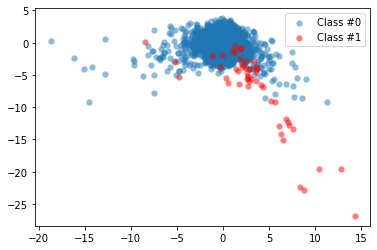

In [ ]:
# Create a function that will generate a scatter plot of our data and labels.
# Use the prep data function to generate X and Y.
# Run our plot data function on X and Y to plot our data.
X, y = prep_data(df)
plot_data(X, y)

#When you visualize the data, you can see right away how dispersed our fraud cases are across the data and how few there are overall. 
#Often, a picture helps to illustrate the imbalance issue. We'll visually explore how to increase our fraud to non-fraud balance in the 
#exercises that follow.

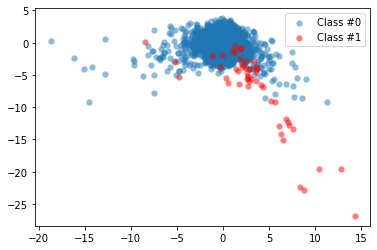

In [ ]:
#replicated utilizing a DataFrame
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 225 kB 6.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
!pip install compare_plots

In [ ]:
#Apply resampling techniques with the Python imblean module.
#from imblearn.over_sampling import RandomOverSampler
#method = RandomOverSampler()
#X_resampled, y_resampled =  method.fit_resample(X, y)
#compare_plot(X_resampled, y_resampled, X, y)
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plotly
import plotly.express as px 
import plotly.graph_objects as go

import sklearn

#date library
import datetime

import warnings
warnings.filterwarnings('ignore')

import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
!pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
#model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#ensemble libraries
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#XGBoost
from xgboost import XGBClassifier

#Catboost
from catboost import CatBoostClassifier


#preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
data = pd.read_csv('/content/sample_data/creditcard.csv', encoding='latin_1')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape
print("The dataset has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The dataset has 51591 rows and 31 columns.


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51590 non-null  float64
 12  V12     51590 non-null  float64
 13  V13     51590 non-null  float64
 14  V14     51590 non-null  float64
 15  V15     51590 non-null  float64
 16  V16     51590 non-null  float64
 17  V17     51590 non-null  float64
 18  V18     51590 non-null  float64
 19  V19     51590 non-null  float64
 20  V20     51590 non-null  float64
 21  V21     51590 non-null  float64
 22

In [ ]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50831,44667,-2.451616,1.973770,0.902784,1.595978,-1.805211,0.841257,-1.597407,2.246228,0.095427,...,-0.147537,-0.462306,0.152206,0.207392,-0.017109,-0.409981,-0.230704,-0.022505,3.99,0.0
50919,44706,-1.582883,1.531487,0.667022,0.158470,-0.985789,-0.527557,-0.223909,0.928606,-0.173164,...,-0.065562,-0.275115,-0.015844,0.542599,0.053804,0.197270,-0.156040,-0.024100,18.73,0.0
50921,44706,-1.567447,1.555799,0.656228,0.152497,-1.040683,-0.490230,-0.172693,0.918241,-0.176195,...,-0.072826,-0.270694,-0.011447,0.543381,0.055775,0.198870,-0.141895,-0.030078,31.05,0.0
50928,44708,-4.678386,3.451893,-1.946664,0.277297,-3.050028,-0.865884,-2.385780,3.357111,-0.523805,...,0.198531,-0.418373,0.241571,0.536152,0.228046,0.160962,-1.251586,-0.306001,12.23,0.0


In [ ]:
data.duplicated().sum()
print("The dataset contains {}, and we need to drop it".format(data.duplicated().sum()))

The dataset contains 226, and we need to drop it


In [ ]:
#dropping duplicated rows
data.drop_duplicates(inplace=True)
print("The dataset after removing duplicates now has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset after removing duplicates now has 51365 rows and 31 columns


**Sampling Data - **

In [ ]:
#Sampling 10% of our the data randomly 
sample_df = data.sample(frac= 0.10, random_state = 42)
sample_df.shape
print("The sampled data has {} rows and {} columns. Random State was set to help reproductivity.".format(sample_df.shape[0],sample_df.shape[1]))

The sampled data has 5136 rows and 31 columns. Random State was set to help reproductivity.


In [ ]:
#checking the distribution of the class from the sample data against the actual data
print(sample_df["Class"].value_counts())
print('\n')
print(sample_df["Class"].value_counts(normalize=True)) #normlize returns the relative frequencies of the class

0.0    5123
1.0      13
Name: Class, dtype: int64


0.0    0.997469
1.0    0.002531
Name: Class, dtype: float64


In [ ]:
print(data["Class"].value_counts())
print('\n')
print(data["Class"].value_counts(normalize=True))

0.0    51214
1.0      150
Name: Class, dtype: int64


0.0    0.99708
1.0    0.00292
Name: Class, dtype: float64


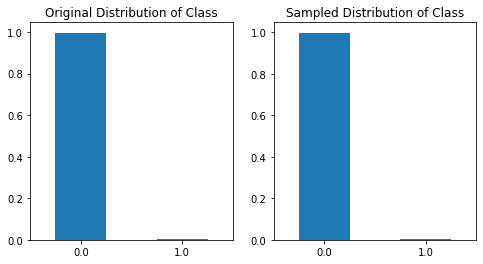

In [ ]:
#visulizing both cases
plt.figure(figsize=(8,4))
#original Data
plt.subplot(1,2,1)
data["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Original Distribution of Class")

#sampled Data
plt.subplot(1,2,2)
sample_df["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Sampled Distribution of Class")

plt.show()

In [ ]:
#saving sampled data for future use. 
sample_df.to_csv("Sample_data.csv",index=False)

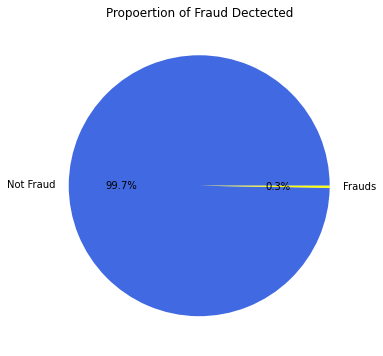

In [ ]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [0,0]
color=['royalblue' , 'yellow']
sizes=sample_df.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.title('Propoertion of Fraud Dectected')
plt.show()

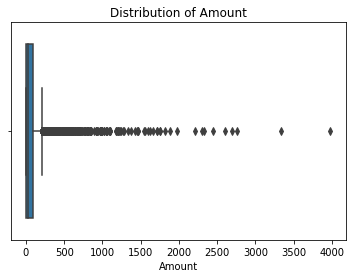

In [ ]:
#Using boxplot to check the distribution of the amount coulmn(Overall Dataset). 
sns.boxplot(x=sample_df["Amount"])
plt.title('Distribution of Amount')
plt.show()

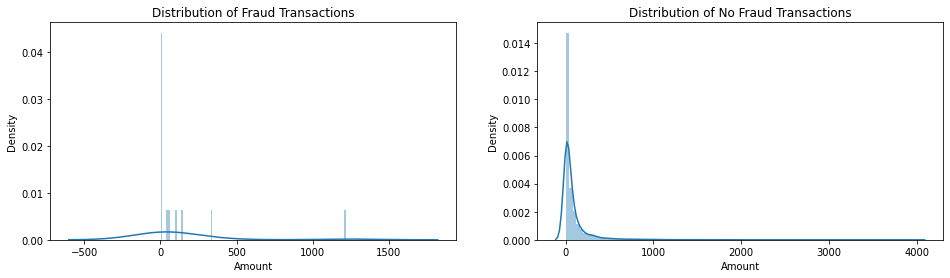

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(sample_df[sample_df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(sample_df[sample_df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

In [ ]:
print("Maximum amount of fraud transaction - ",sample_df[(sample_df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",sample_df[(sample_df['Class'] == 1)]['Amount'].min())
print('\n')
print("Maximum amount of no fraud transaction - ",sample_df[(sample_df['Class'] == 0)]['Amount'].max())
print("Minimum amount of no fraud transaction - ",sample_df[(sample_df['Class'] == 0)]['Amount'].min())

Maximum amount of fraud transaction -  1218.89
Minimum amount of fraud transaction -  1.0


Maximum amount of no fraud transaction -  3980.0
Minimum amount of no fraud transaction -  0.0


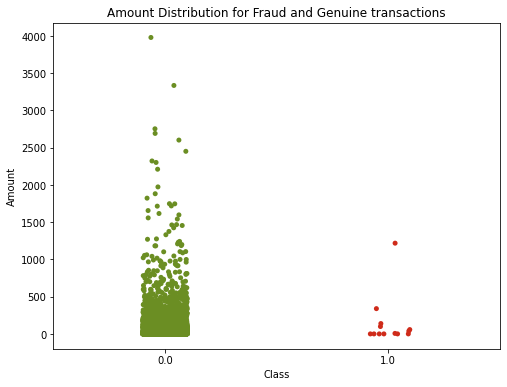

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Class', y='Amount',data = sample_df,palette= ["#6b8e23","#cf2b1a"])
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

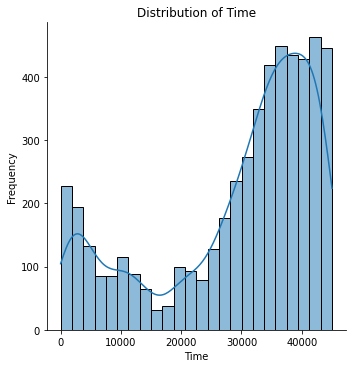

In [ ]:
#Using boxplot to check the distribution of the amount coulmn. 
sns.displot(data=sample_df, x="Time", kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

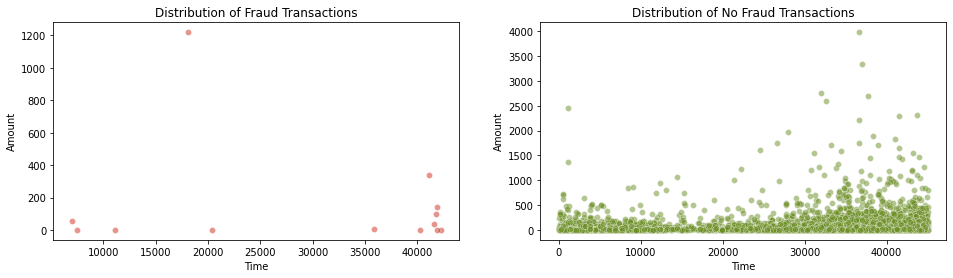

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.scatterplot(x='Time',y='Amount', data=sample_df[sample_df['Class']==1], ax=axs[0],color="#cf2b1a",alpha = 0.5)
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=sample_df[sample_df['Class']==0], ax=axs[1],color="#6b8e23",alpha = 0.5)
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

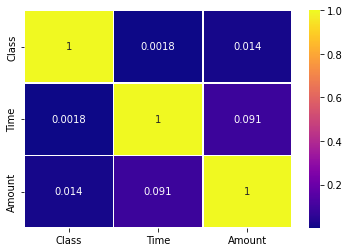

In [ ]:
sns.heatmap(sample_df[["Class","Time","Amount"]].corr(),annot=True,linewidths=0.5,cmap="plasma")

In [ ]:
#predictor
X = sample_df.drop("Class", axis=1)

#target variable
y = sample_df["Class"]

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
23358,32719,-0.457886,1.100242,1.133049,0.789647,0.083359,-0.331886,0.639093,0.070959,-0.217848,...,-0.030713,0.131752,0.463134,-0.114715,0.041362,-0.339298,-0.294857,0.290876,0.213818,11.29
10880,18649,1.294424,-0.512157,-0.546178,-1.696400,1.395499,3.485397,-1.230323,0.877123,2.955589,...,-0.025903,-0.211257,-0.269834,-0.066246,0.957402,0.638362,-0.710530,0.068991,0.023276,6.70
11168,19346,0.560890,-0.960751,1.176974,2.068254,-1.042797,0.899834,-0.502522,0.355188,2.450713,...,0.148721,-0.371876,-0.998067,-0.085798,0.131125,0.208651,-0.598606,0.006465,0.052809,250.51
31563,36415,1.208199,0.388296,0.259284,1.020907,-0.005395,-0.475053,0.206985,-0.040707,-0.383335,...,-0.132651,-0.444463,-1.384402,0.173939,-0.081966,0.257222,-0.833198,0.004874,0.015978,7.40
31905,36556,1.287944,0.807170,-0.208934,2.279783,0.704599,-0.342407,0.622447,-0.291085,-1.158905,...,-0.069512,-0.057532,-0.129684,-0.221658,-0.427543,0.877594,0.117169,-0.033912,0.003912,3.62


In [ ]:
y.head()

23358    0.0
10880    0.0
11168    0.0
31563    0.0
31905    0.0
Name: Class, dtype: float64

In [ ]:
#split 70 - 30. 70 for training and 30 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=1415)

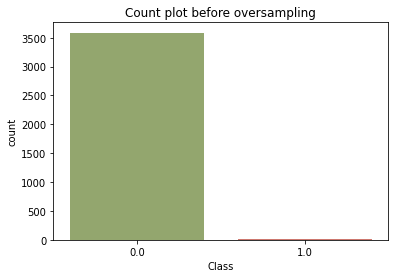

In [ ]:
sns.countplot(y_train,palette= ["#6b8e23","#cf2b1a"],alpha=0.7)
plt.title('Count plot before oversampling')
plt.show()

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (3595, 30)
y_train -  (3595,)
X_test -  (1541, 30)
y_test -  (1541,)


In [ ]:
#Instantiating SMOTE
smote = SMOTE(random_state = 1415)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0.0: 3586, 1.0: 9})
After SMOTE: Counter({0.0: 3586, 1.0: 3586})


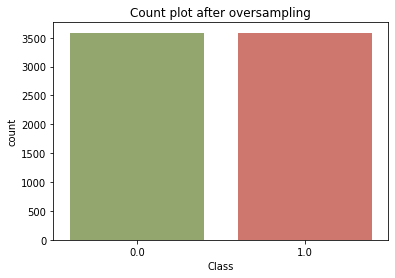

In [ ]:
sns.countplot(y_train_smote,palette= ["#6b8e23","#cf2b1a"],alpha=0.7)
plt.title('Count plot after oversampling')
plt.show()

**Predictive Models**

In [ ]:
#Instantiating the model and setting up grid search
#Hyperparameter tuning for Random Forest
rf = RandomForestClassifier(random_state = 42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_rfc = GridSearchCV(rf, param_grid = param_grid,cv =5,scoring = 'f1', n_jobs=-1)

#Fitting the model with X_train, y_train
grid_rfc.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.62
Best parameters: {'max_features': 1, 'max_leaf_nodes': 2}


***EXPLORATORY DATA ANALYSIS***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [7]:
data = pd.read_csv('/content/sample_data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [8]:
data.shape

(284807, 31)

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


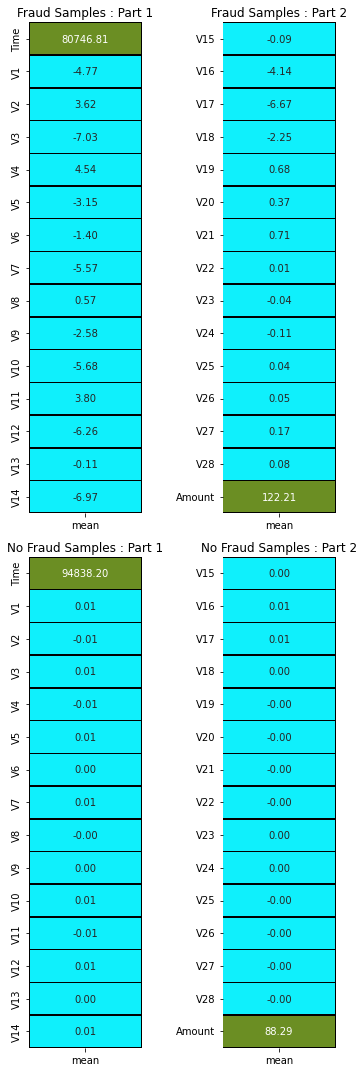

In [13]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#0FF0FC','#6b8e23']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

***VISUALS***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


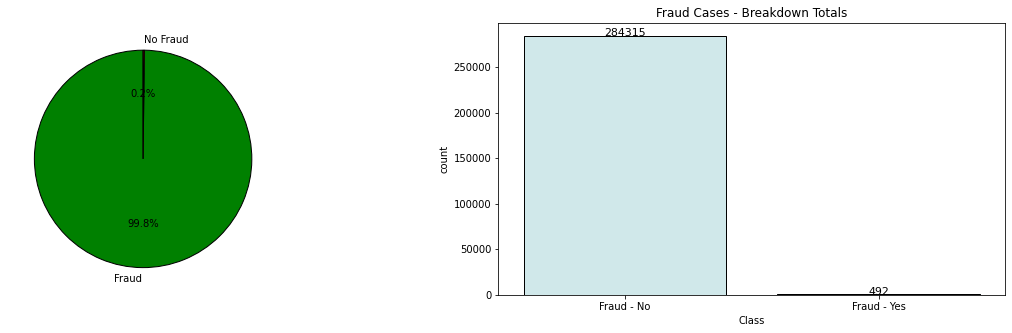

In [31]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = "Greens",
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot('Class',data = data,edgecolor = 'black',palette = ['#ccecee',"#095d7e"])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Fraud - No','Fraud - Yes'])
plt.title('Fraud Cases - Breakdown Totals');

***FEATURE SELECTION***

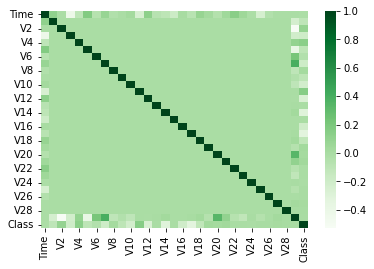

In [24]:
sns.heatmap(data.corr(),cmap = "Greens" ,cbar = True)

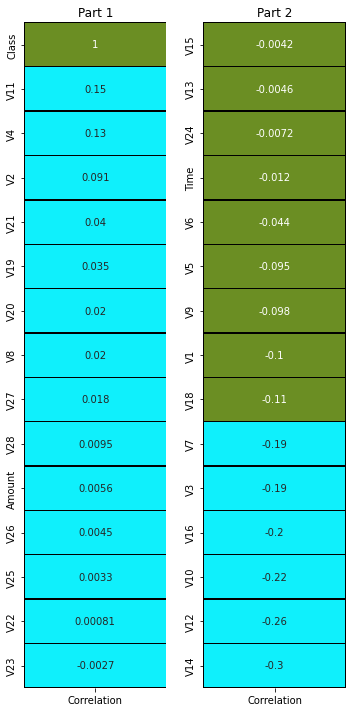

In [32]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

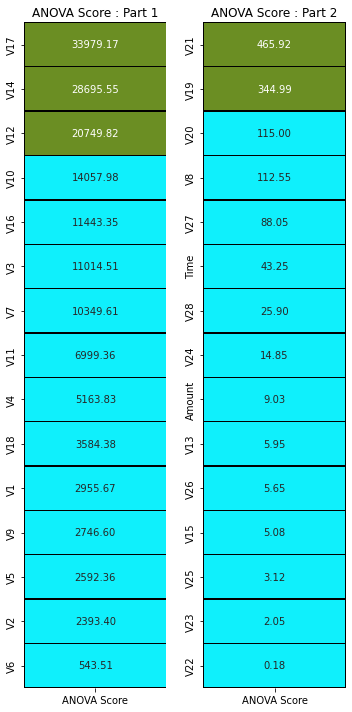

In [34]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

In [35]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


In [36]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


***BALANCING DATA***

In [37]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [38]:
#Counter No. 1
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

In [40]:
#Counter No. 2
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4920, 1: 2460})

***MODEL BUILDING***

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [59]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

In [86]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'BuPu',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
classifier_lr = LogisticRegression(random_state = 0,C=12,penalty= 'l2') 

Cross Validation Score :  98.22%
ROC_AUC Score :  94.15%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


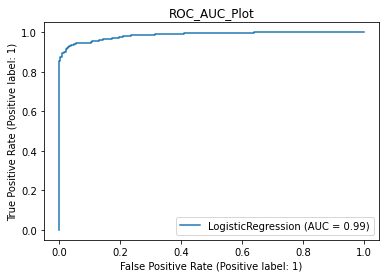

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.89      0.93       501

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



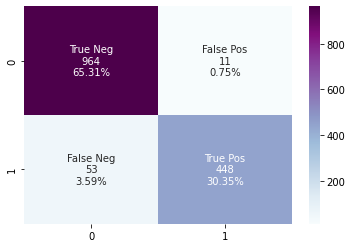

In [87]:
#Logistic Regression
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

Cross Validation Score :  98.54%
ROC_AUC Score :  94.36%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


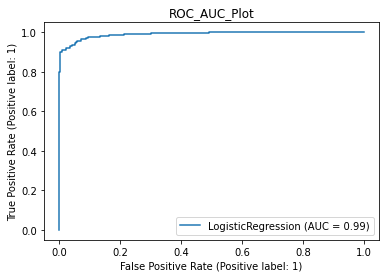

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       975
           1       0.99      0.89      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



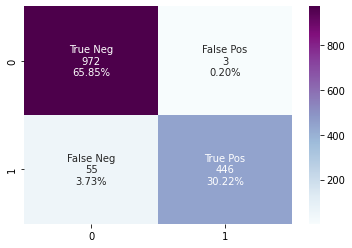

In [88]:
#ANOVA Score
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

Cross Validation Score :  98.15%
ROC_AUC Score :  93.90%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


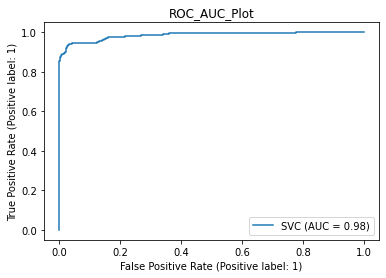

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.99      0.88      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



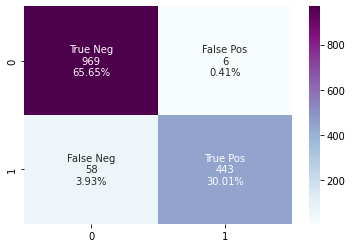

In [89]:
#Support Vector Classifier
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1)

model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)